In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

### 1. Wczytuje dane

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv", encoding="utf-8")
test_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv", encoding="utf-8")
val_df=pd.read_csv("D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv", encoding="utf-8")

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']


caly_df = pd.concat([train_df, test_df, val_df])


caly_label=caly_df["IE"]

del caly_df["IE"]
del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]

In [3]:
len(caly_label)

1881

In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Województwo     1881 non-null   object 
 1   Data urodzenia  1881 non-null   int64  
 2   PI-PROD         1881 non-null   int64  
 3   PI-POKR         1881 non-null   int64  
 4   Prc             1881 non-null   int64  
 5   Psm             1881 non-null   int64  
 6   Pnr             1881 non-null   int64  
 7   Pw              1881 non-null   int64  
 8   PI-PLOD         1881 non-null   int64  
 9   CRj             1881 non-null   int64  
 10  CRk             1881 non-null   int64  
 11  PP              1881 non-null   int64  
 12  OMC             1881 non-null   int64  
 13  WH-KSOM         1881 non-null   int64  
 14  WH-DLUG         1881 non-null   int64  
 15  IP              1881 non-null   int64  
 16  kg ml           1881 non-null   int64  
 17  kg tł           1881 non-null   in

### 2. Usuwam zmienne kategoryczne

In [5]:
del caly_df["kategoria"]
del caly_df["Data urodzenia"]
del caly_df["Województwo"]

In [6]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PI-PROD  1881 non-null   int64  
 1   PI-POKR  1881 non-null   int64  
 2   Prc      1881 non-null   int64  
 3   Psm      1881 non-null   int64  
 4   Pnr      1881 non-null   int64  
 5   Pw       1881 non-null   int64  
 6   PI-PLOD  1881 non-null   int64  
 7   CRj      1881 non-null   int64  
 8   CRk      1881 non-null   int64  
 9   PP       1881 non-null   int64  
 10  OMC      1881 non-null   int64  
 11  WH-KSOM  1881 non-null   int64  
 12  WH-DLUG  1881 non-null   int64  
 13  IP       1881 non-null   int64  
 14  kg ml    1881 non-null   int64  
 15  kg tł    1881 non-null   int64  
 16  % tł     1881 non-null   int64  
 17  kg bi    1881 non-null   int64  
 18  % bi     1881 non-null   int64  
 19  rc       1881 non-null   float64
 20  sm       1881 non-null   float64
 21  nr       1881 n

In [7]:
nazwy_kolumn=caly_df.columns

### 3. Wybieram najlepsze zmienne według REFCV na regresji liniowej

In [8]:
mae_scorer = make_scorer(mean_absolute_error)

In [45]:
estimator=LinearRegression()
selector = RFECV(estimator, step=1, cv=5,scoring=mae_scorer)
scaler = StandardScaler()
data_frame = scaler.fit_transform(caly_df)
selector2 = selector.fit(data_frame, caly_label)


In [46]:
selector2.ranking_

array([15, 12,  7, 14, 18, 19, 11, 10,  5, 20,  3,  2,  6,  1,  4,  1, 21,
        1, 22, 16, 17, 13,  9,  8])

In [47]:
dictionary = dict(zip(nazwy_kolumn, selector2.ranking_))
dictionary= dict(sorted(dictionary.items(), key=lambda item: item[1]))

In [48]:
dictionary

{'IP': 1,
 'kg tł': 1,
 'kg bi': 1,
 'WH-KSOM': 2,
 'OMC': 3,
 'kg ml': 4,
 'CRk': 5,
 'WH-DLUG': 6,
 'Prc': 7,
 'og': 8,
 'w': 9,
 'CRj': 10,
 'PI-PLOD': 11,
 'PI-POKR': 12,
 'nr': 13,
 'Psm': 14,
 'PI-PROD': 15,
 'rc': 16,
 'sm': 17,
 'Pnr': 18,
 'Pw': 19,
 'PP': 20,
 '% tł': 21,
 '% bi': 22}

In [15]:
nazwy_kolumn_2=[]
for x in dictionary.keys():
    nazwy_kolumn_2.append(x)

In [16]:
caly_df_zapas=caly_df

In [17]:
nazwy_kolumn_2

['IP',
 'kg tł',
 'kg bi',
 'WH-KSOM',
 'OMC',
 'kg ml',
 'CRk',
 'WH-DLUG',
 'Prc',
 'og',
 'w',
 'CRj',
 'PI-PLOD',
 'PI-POKR',
 'nr',
 'Psm',
 'PI-PROD',
 'rc',
 'sm',
 'Pnr',
 'Pw',
 'PP',
 '% tł',
 '% bi']

In [24]:
dane_do_porownania=pd.DataFrame(columns=["Liczba zmiennych",
                                    "Błąd"])
kombinacje=[]
glowne_wyniki=[]
glowne_zmienne=[]
for i in range(0,len(nazwy_kolumn_2)):
    zmienne=[]
    for q in range(0,i+1):
        zmienne.append(nazwy_kolumn_2[q])
    kombinacje.append(zmienne)
    data_frame=caly_df_zapas[zmienne]
    kfold = KFold(n_splits=5, shuffle=False)
    
    scaler = StandardScaler()
    data_frame = scaler.fit_transform(data_frame)
    
    data_frame = np.array(data_frame)
    caly_label = np.array(caly_label)
    
    wyniki=[]
    
    for train, test in kfold.split(data_frame, caly_label):
        reg = KNeighborsRegressor()
        reg.fit(data_frame[train], caly_label[train])
        predykcje=reg.predict(data_frame[test])
        
        dane_folda=pd.DataFrame({"pred": predykcje.ravel(),
                                    "obs": caly_label[test]
                                })
        
        dane_folda['blad']=abs(dane_folda['obs']-dane_folda['pred'])
        mae=dane_folda['blad'].sum()/len(dane_folda['blad'])
        wyniki.append(mae)
        
    wynik=sum(wyniki)/len(wyniki)
    glowne_wyniki.append(wynik)
    glowne_zmienne.append(i)

                       

In [25]:
dane_do_porownania["Liczba zmiennych"]=glowne_zmienne
dane_do_porownania["Błąd"]=glowne_wyniki

In [27]:
list(dane_do_porownania["Błąd"])

[127.5186212540211,
 130.260814662227,
 130.868804108584,
 102.55273294203963,
 84.0928977368926,
 74.81746769005024,
 71.65468085106383,
 64.7437200180597,
 67.72666064676336,
 71.28569727411254,
 71.28025452903663,
 74.93715700660309,
 75.33796207460918,
 77.12056690558158,
 79.21750832439753,
 79.88133585416783,
 78.96329420396185,
 80.79519809244314,
 82.56210198092444,
 84.85288362774423,
 84.29290592019866,
 85.87047096337264,
 87.21310316609289,
 88.78599695242394]

In [66]:
list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"])))

7

In [67]:
min(list(dane_do_porownania["Błąd"]))

64.7437200180597

In [68]:
dane_do_porownania["Błąd"][7]

64.7437200180597

In [34]:
len(dane_do_porownania["Błąd"])

24

In [69]:
kombinacje[7]

['IP', 'kg tł', 'kg bi', 'WH-KSOM', 'OMC', 'kg ml', 'CRk', 'WH-DLUG']

In [70]:
len(kombinacje[7])

8

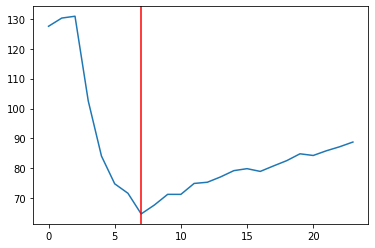

In [65]:
plt.plot(list(dane_do_porownania["Błąd"]))
plt.axvline(x=list(dane_do_porownania["Błąd"]).index(min(list(dane_do_porownania["Błąd"]))), color='r', linestyle='-')
plt.show()

8 zmiennych włącznie daje najmniejszy bład

In [12]:
zestaw_caly=caly_df
zestaw_8=caly_df[['IP', 'kg tł', 'kg bi', 'WH-KSOM', 'OMC', 'kg ml', 'CRk', 'WH-DLUG']]


# Tworze zestaw Feature Extraction

In [9]:
fe_df = caly_df.copy()

fe_df['IP|Psm']=fe_df['IP']/fe_df['Psm']
fe_df['kg tł|sm']=fe_df['kg tł']/fe_df['sm']
fe_df['PP|OMC']=fe_df['PP']/fe_df['OMC']
fe_df['Pnr|nr']=fe_df['Pnr']/fe_df['nr']


del fe_df['IP']
del fe_df['Psm']
del fe_df['kg tł']
del fe_df['sm']
del fe_df['PP']
del fe_df['OMC']
del fe_df['Pnr']
del fe_df['nr']

#fe_df = np.array(fe_df)

#caly_label = np.array(caly_label)

### 4. Wyszukuje hiper-parametry

In [10]:
scaler = StandardScaler()

In [13]:

zestaw_caly = scaler.fit_transform(zestaw_caly)
zestaw_8= scaler.fit_transform(zestaw_8)
fe_df=scaler.fit_transform(fe_df)

zestaw_caly = np.array(zestaw_caly)
zestaw_8 = np.array(zestaw_8)
fe_df=np.array(fe_df)

caly_label = np.array(caly_label)


#### 4.1 Wszystkie dane

In [12]:
param_grid = {
    'n_neighbors':range(1,15,3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1,15,3),
    'p': [1,2],
}


In [13]:
knn_1 = KNeighborsRegressor()
grid_search_1 = GridSearchCV(estimator = knn_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 400 candidates, totalling 800 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 15, 3),
                         'n_neighbors': range(1, 15, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [14]:
grid_search_1.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=1, n_neighbors=13, p=1,
                    weights='distance')

In [15]:
grid_search_1.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 1,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

In [16]:
grid_search_1.best_score_

-99.3847224463368

#### 4.1.2 Wszystkie dane part 2

In [17]:
param_grid = {
    'n_neighbors':range(10,16,1),
    'weights': ['distance'],
    'algorithm': ['kd_tree'],
    'leaf_size': range(1,4,1),
    'p': [1],
}


In [18]:
knn_1 = KNeighborsRegressor()
grid_search_1 = GridSearchCV(estimator = knn_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_1.fit(zestaw_caly, np.ravel(caly_label))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': range(1, 4),
                         'n_neighbors': range(10, 16), 'p': [1],
                         'weights': ['distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [19]:
grid_search_1.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=1, n_neighbors=13, p=1,
                    weights='distance')

In [20]:
grid_search_1.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 1,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

In [21]:
grid_search_1.best_score_

-99.3847224463368

#### 4.2 Zestaw 8 zmiennych

In [27]:
param_grid = {
    'n_neighbors':range(1,15,3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1,15,3),
    'p': [1,2]
}


In [28]:
knn_2 = KNeighborsRegressor()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_8, np.ravel(caly_label))

Fitting 2 folds for each of 400 candidates, totalling 800 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 15, 3),
                         'n_neighbors': range(1, 15, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [29]:
grid_search_2.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, n_neighbors=13, p=1,
                    weights='distance')

In [30]:
grid_search_2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'distance'}

In [32]:
grid_search_2.best_score_

-101.91945012320883

#### 4.2.2 Zestaw 8 zmiennych part 2

In [33]:
param_grid = {
    'n_neighbors':range(10,16,1),
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
    'leaf_size': range(8,13,1),
    'p': [1]
}


In [34]:
knn_2 = KNeighborsRegressor()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(zestaw_8, np.ravel(caly_label))

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': range(8, 13),
                         'n_neighbors': range(10, 16), 'p': [1],
                         'weights': ['distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [35]:
grid_search_2.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=8, n_neighbors=15, p=1,
                    weights='distance')

In [36]:
grid_search_2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 8,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

In [37]:
grid_search_2.best_score_

-101.59602853155315

#### 4.3 Zestaw FE

In [54]:
param_grid = {
    'n_neighbors':range(1,15,3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1,15,3),
    'p': [1,2]
}


In [55]:
knn_2 = KNeighborsRegressor()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(fe_df, np.ravel(caly_label))

Fitting 2 folds for each of 400 candidates, totalling 800 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 15, 3),
                         'n_neighbors': range(1, 15, 3), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
grid_search_2.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, n_neighbors=4,
                    weights='distance')

In [57]:
grid_search_2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'distance'}

In [58]:
grid_search_2.best_score_

-77.75311736000859

#### 4.3.2 Zestaw FE part 2

In [59]:
param_grid = {
    'n_neighbors':range(1,6,1),
    'weights': ['distance'],
    'algorithm': ['ball_tree'],
    'leaf_size': range(1,5,1),
    'p': [2]
}


In [60]:
knn_2 = KNeighborsRegressor()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1,scoring='neg_mean_absolute_error')
grid_search_2.fit(fe_df, np.ravel(caly_label))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': range(1, 5),
                         'n_neighbors': range(1, 6), 'p': [2],
                         'weights': ['distance']},
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
grid_search_2.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, weights='distance')

In [62]:
grid_search_2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [63]:
grid_search_2.best_score_

-77.64372258683858

### 5. Przeprowadzam 5 krotną cross-validację

#### 5.1 Wszystkie dane

In [64]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = KNeighborsRegressor(algorithm='kd_tree',n_neighbors=13, leaf_size=1, p=1, weights='distance')

    
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje) #y tre, y pred
    wart_2.append(sredni_blad)
    licznik+=1

In [65]:
wart_2

[83.97302183208735,
 73.86782795593071,
 71.92646351935659,
 69.84575013263355,
 76.24233686356142]

In [66]:
sum(wart_2)/len(wart_2)

75.17108006071393

#### 5.2 Zestaw 8 

In [76]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]
for train, test in kfold.split(zestaw_8, caly_label):
    reg = KNeighborsRegressor(algorithm='ball_tree', leaf_size=8,n_neighbors=15, p=1, weights='distance')

    
    reg.fit(zestaw_8[train], caly_label[train])
    predykcje=reg.predict(zestaw_8[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [77]:
wart_1

[66.19447269329228,
 56.70508636534909,
 55.50310137995617,
 53.11986899758099,
 58.1686535777079]

In [78]:
sum(wart_1)/len(wart_1)

57.93823660277728

In [83]:
kombinacje[7]

['IP', 'kg tł', 'kg bi', 'WH-KSOM', 'OMC', 'kg ml', 'CRk', 'WH-DLUG']

#### 5.3 Zestaw FE

In [14]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]
for train, test in kfold.split(fe_df, caly_label):
    reg = KNeighborsRegressor(algorithm='ball_tree', leaf_size=1,n_neighbors=5, p=2, weights='distance')    

    
    reg.fit(fe_df[train], caly_label[train])
    predykcje=reg.predict(fe_df[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    sredni_blad=mean_absolute_error(caly_label[test],predykcje)
    wart_1.append(sredni_blad)
    licznik+=1

In [15]:
wart_1

[74.24369869630375,
 72.50922844974043,
 65.9896700924312,
 65.37895276805318,
 68.32676217509731]

In [16]:
sum(wart_1)/len(wart_1)

69.28966243632517

In [17]:
dane_do_zapisu_1.head()

,pred,obs,Fold
0,2120.000000,2120,1
1,2216.645094,1912,1
2,2191.467880,2126,1
3,2089.000000,2089,1
4,2424.605816,2853,1


In [18]:
dane_do_zapisu_1.to_csv("D:/STUDIA/ROK_II/Projekt/Predykcje_i błędy/06 09/IE/IE_KNN_FE 15 11 (new).csv")